In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pylab
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
from scipy.special import lambertw

In [2]:
#print c.sigma_sb, c.R
sigma=c.sigma_sb.value
R=c.R.value
g=(c.M_earth*c.G/c.R_earth/c.R_earth).value

In [3]:
def tau_rad(T,Fs,D=1.5):
    return (2*sigma*T**4/Fs - 1.0)/D

def tau_sat(T,kappa,l,psat0,h,gin=g):
    return kappa*h*psat0/gin*np.exp(-l/(R*T))

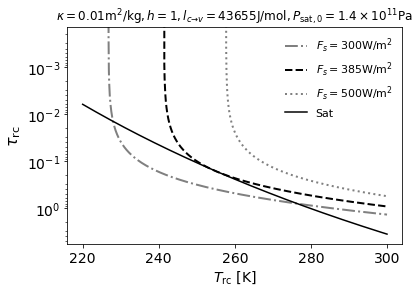

In [4]:
fig= plt.figure()
ax = fig.add_subplot(111)
Tl=np.linspace(220,300,1000)
ax.plot(Tl,tau_rad(Tl,300),color="gray",ls="-.",lw=2)
ax.plot(Tl,tau_rad(Tl,385),color="black",ls="dashed",lw=2)
ax.plot(Tl,tau_rad(Tl,500),color="gray",ls="dotted",lw=2)
ax.plot(Tl,tau_sat(Tl,0.01,43655,1.4e11,1,g),color="black")
plt.legend(["$F_s=300 \mathrm{W/m^2}$","$F_s=385 \mathrm{W/m^2}$","$F_s=500 \mathrm{W/m^2}$","Sat"],loc="upper right",prop={'size':11},frameon=False)
plt.gca().invert_yaxis()
pylab.yscale("log")
plt.tick_params(labelsize=14)
plt.ylabel("$\\tau_\mathrm{rc}$",fontsize=16)
plt.xlabel("$T_\mathrm{rc}$ [K]",fontsize=14)
plt.title("$\\kappa=0.01 \\mathrm{m^2/kg}, h=1, l_{c \\to v} =43655 \\mathrm{J/mol},P_{\\mathrm{sat},0}=1.4 \\times 10^{11} \\mathrm{Pa}$")
plt.savefig("KIL.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

In [5]:
def KLapprox(kappa,l,psat0,h,gin=g,D=1.5):
    Q=4.0*gin/(np.exp(1)*D*kappa*h*psat0)
    WQ=lambertw(-Q,k=-1)
    #print Q,WQ,"--"
    fsmax=2.0*sigma*(-l/R/WQ)**4
    return fsmax.real

In [6]:
def Qw(kappa,l,psat0,h,gin=g,D=1.5):
    Q=4.0*gin/(np.exp(1)*D*kappa*h*psat0)
    return Q

In [7]:
def tautpcheck(kappa,l,psat0,h,gin=g,D=1.5):
    Fsmax=KLapprox(kappa,l,psat0,h,gin,D)
    tautp=4.0*R/D/l*(Fsmax/(2.0*sigma))**(0.25)
    Q=4.0*gin/(np.exp(1)*D*kappa*h*psat0)
    #print tautp,Q**0.25/1.5*4,Q
    return tautp

In [8]:
def KLapproxA(kappa,l,psat0,h,gin=g,D=1.5):
    Q=4.0*gin/(np.exp(1)*D*kappa*h*psat0)
    WQ=np.log(Q)-np.log(-np.log(Q))
    #print Q,WQ
    fsmax=2.0*sigma*(-l/R/WQ)**4
    return fsmax

In [10]:
#fiducial value
Qfid=Qw(0.01,43655,1.4e11,1)
print(Qfid)

6.86596043769e-09


In [11]:
def G(q):
    return (-lambertw(-q,k=-1))**-4

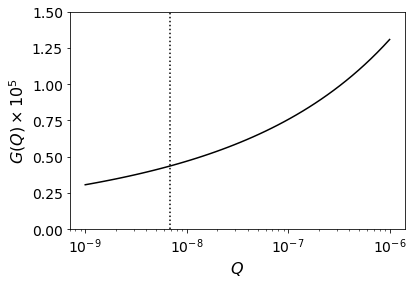

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
q=np.logspace(-9,-6)
ax.plot(q,np.real(G(q)*100000),color="black")
#pylab.yscale('log')
pylab.xscale("log")
plt.tick_params(labelsize=14)
plt.ylabel("$G(Q) \\times 10^5$",fontsize=16)
plt.xlabel("$Q$",fontsize=16)
pylab.ylim(0,1.5)
pylab.axvline(Qfid,color="black",ls="dotted")
plt.savefig("gQ.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()